# Hypertension By Neighborhoods
## by Leo Liang
___

### We first start by importing the necessary pandas for our datasets,
#### then read in our first file: the dataset on hypertension and hyperlipidemia

In [1]:
import geopandas as gpd
import pandas as pd

hyper_data = gpd.read_file("Data/hypertension_hyperlipidemia_all.csv")

#insert mickey mouse secret tool used for later here
hyper_data

,CT,LTPAD,LTPAN,LTWAD,LTWAN,LTMAD,LTMAN,geometry
0,10300,422,28,197,13,225,15,None
1,20100,2610,175,1242,73,1368,102,None
2,20300,354,38,175,12,179,26,None
3,30500,859,147,553,103,306,44,None
4,40200,388,44,233,29,155,15,None
...,...,...,...,...,...,...,...,...
385,564400,2797,630,1529,333,1268,297,None
386,564500,806,146,440,78,366,68,None
387,980000,4,1,3,1,1,0,None
388,980100,7,0,6,0,1,0,None


#### The column names don't really tell us anything, so either we trust my description of each column (totaly reliable :]) or we can rely on the data dictionary for this data set.

In [2]:
diction = pd.read_csv("Data/hypertension-data-dictionary.csv")
diction

,column,type,label,description
0,CT,text,NaN,Census Tract\r\n
1,LTPAD,text,NaN,"Total number of members, who are Allegheny Cou..."
2,LTPAN,text,NaN,Total number of members who met the denominato...
3,LTWAD,text,NaN,"Total number of women members, who are Alleghe..."
4,LTWAN,text,NaN,Total number of women members who met the deno...
5,LTMAD,text,NaN,"Total number of male members, who are Alleghen..."
6,LTMAN,text,NaN,Total number of male members who met the denom...


#### Damn word cut offs...

In [3]:
i = 0
for d in diction["description"]:
    print(diction.loc[i, "column"]+":", d)
    i+=1

CT: Census Tract

LTPAD: Total number of members, who are Allegheny County residents and who were effectively enrolled for at least 90 continuous days during the 2015 calendar year (Jan 1 - Dec 31).

LTPAN: Total number of members who met the denominator criteria, who are diagnosed with Hypertension & diagnosed with Hyperlipidemia.

LTWAD: Total number of women members, who are Allegheny County residents and who were effectively enrolled for at least 90 continuous days during the 2015 calendar year (Jan 1 - Dec 31).

LTWAN: Total number of women members who met the denominator criteria, who are diagnosed with Hypertension & diagnosed with Hyperlipidemia.

LTMAD: Total number of male members, who are Allegheny County residents and who were effectively enrolled for at least 90 continuous days during the 2015 calendar year (Jan 1 - Dec 31).

LTMAN: Total number of male members who met the denominator criteria, who are diagnosed with Hypertension & diagnosed with Hyperlipidemia.



#### From this, we can see that *LTPAD* is the total number of people with within this research's population, whereas *LTPAN* is the total number of people diagnosed with Hypertension and Hyperlipidemia.
  
### Now, lets start plotting

#### First, we import a file containing different census tracks and the respective neighborhood it maps to:

In [4]:
mapdata = gpd.read_file("Data/pittsburghpaneighborhoods-/Neighborhoods_.shp")
mapdata

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.997845e+06,14216.959213,"POLYGON ((-79.96601 40.45520, -79.96596 40.454..."
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.410563e+06,12003.269761,"POLYGON ((-79.98845 40.41851, -79.98821 40.418..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,215,42,003,141000,1,420031410001,Block Group 1,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,5362860.0,93ce438e-e3ec-410d-a7fd-619646e25dc3,5.362506e+06,16007.508980,"POLYGON ((-79.89709 40.42765, -79.89661 40.427..."
86,87,211,42,003,051100,1,420030511001,Block Group 1,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,9529806.0,2858633a-175e-459b-a4c9-9aac92bfe033,9.519745e+06,19569.102832,"POLYGON ((-79.95848 40.44846, -79.95849 40.448..."
87,88,153,42,003,562600,2,420035626002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,16904768.0,fbc3ab11-0429-476e-80fd-700f969b204a,1.690646e+07,21634.558817,"POLYGON ((-80.02795 40.44463, -80.02806 40.444..."
88,89,16,42,003,170200,1,420031702001,Block Group 1,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,26083320.0,39308990-70d5-4da6-b2a0-a5510f18e9b9,2.608218e+07,34676.151320,"POLYGON ((-79.97726 40.43272, -79.97725 40.432..."


#### Now, trust me this time that there is a neighborhoods column because text cut off sucks sometimes :P

#### We then make a Dataframe containting the cenus tracts to their respective neighborhoods

In [21]:
neighborhoods = pd.DataFrame(columns = ["CT", "Neighborhoods", "Condition Average"])
neighborhoods["CT"] = mapdata["tractce10"]
neighborhoods["Neighborhoods"] = mapdata["hood"]

neighborhoods

,CT,Neighborhoods,Condition Average
0,140500,Point Breeze North,NaN
1,140100,Squirrel Hill North,NaN
2,101700,Garfield,NaN
3,050900,Bedford Dwellings,NaN
4,300100,Knoxville,NaN
...,...,...,...
85,141000,Regent Square,NaN
86,051100,Terrace Village,NaN
87,562600,Elliott,NaN
88,170200,South Side Flats,NaN


#### Now that we have this table of, all thats left is to populate it with the neighborhood's statistics for hypertension and hyperlipidemia

In [22]:
hyper = hyper_data.set_index("CT")
neigh = neighborhoods.set_index("CT")

for i, row in hyper.iterrows():
    for j, row2 in neigh.iterrows():
        if i == j:
            if float(row["LTPAD"]) < 50:          #elminates neighborhoods with less than 50 total samples
                continue
            row2["Condition Average"] = float(row["LTPAN"])/float(row["LTPAD"])
            break
neigh

,Neighborhoods,Condition Average
CT,,
140500,Point Breeze North,0.121212
140100,Squirrel Hill North,0.099307
101700,Garfield,0.112782
050900,Bedford Dwellings,NaN
300100,Knoxville,0.13883
...,...,...
141000,Regent Square,0.1
051100,Terrace Village,NaN
562600,Elliott,NaN


#### Data for some neighborhoods are missing due to the research csv file not having data on some neighborhoods

In [30]:
neigh = neigh.sort_values("Condition Average", ascending=True)
neigh

,level_0,index,CT,Neighborhoods,Condition Average
0,54,54,260900,Northview Heights,0.034261
1,53,53,110200,Highland Park,0.089850
2,52,52,250300,Central Northside,0.093333
3,51,51,101100,Upper Lawrenceville,0.094866
4,50,50,140100,Squirrel Hill North,0.099307
...,...,...,...,...,...
85,85,85,040200,West Oakland,NaN
86,86,86,563000,Windgap,NaN
87,87,87,020300,Strip District,NaN
88,88,88,051100,Terrace Village,NaN


#### Now we can plot the data as a bar graph to visualize it

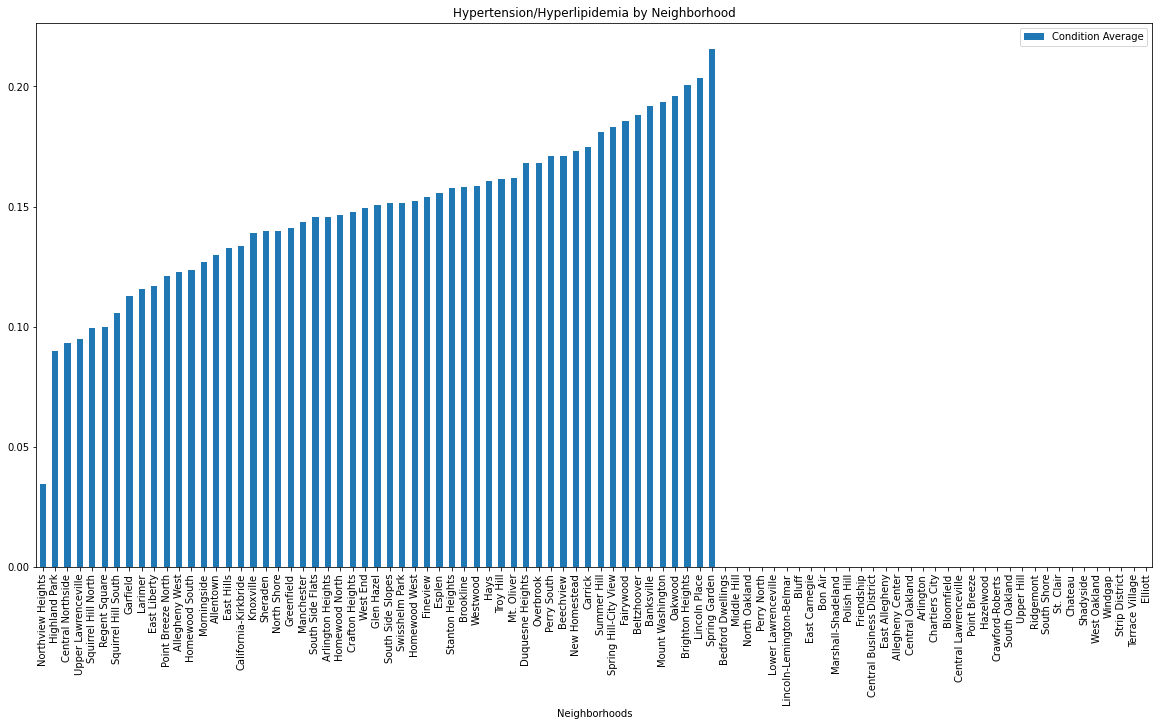

In [27]:
plot = neigh.plot(kind='bar', x="Neighborhoods", y="Condition Average", title="Hypertension/Hyperlipidemia by Neighborhood", figsize=(20,10))

#### The neighborhoods with the lowest percentage of people afflicted with hypertension and hyperlipidemia are towards the left side  

#### Now lets map the data to visualize which region is the best

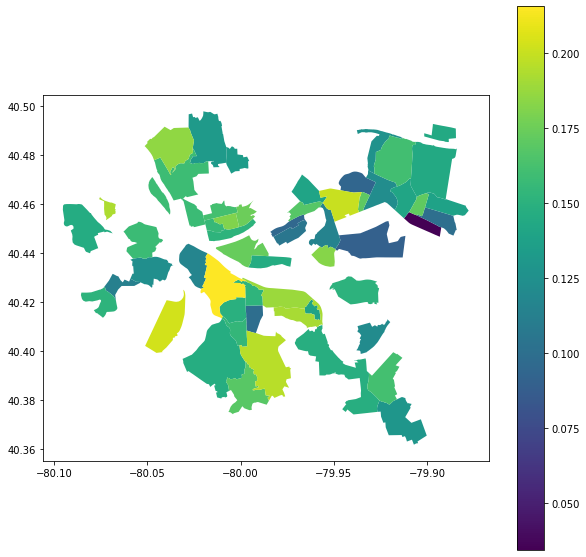

In [28]:
neigh[["Condition Average"]] = neigh[["Condition Average"]].astype(float)

neigh = neigh.reset_index()
mapdata["Condition Average"] = neigh["Condition Average"]

mapdata.plot(column="Condition Average", legend=True, figsize=(10,10))

#### It seems that the Northeast regionn of Pittsburgh may have the lowest rate of hypertension and hyperlipidemia!